In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import ast
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from pydub import AudioSegment

In [2]:
import src.load_music as load

In [3]:
tracks = load.load_meta('./fma/fma_metadata/fma_metadata/tracks.csv')

In [4]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]

In [5]:
x_train = load.dataset_from_path(numbers=y_train.index)

2021-12-15 01:08:47.707165: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-12-15 01:08:47.707201: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ornstein
2021-12-15 01:08:47.707210: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ornstein
2021-12-15 01:08:47.707333: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2021-12-15 01:08:47.707360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.86.0
2021-12-15 01:08:47.707368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.86.0
2021-12-15 01:08:47.708271: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical op

In [11]:
x_test = load.dataset_from_path(numbers=y_test.index)

In [6]:
x_train.take(0)

<TakeDataset shapes: <unknown>, types: tf.float32>

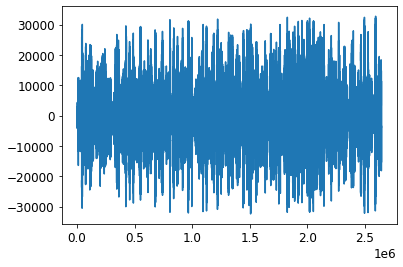

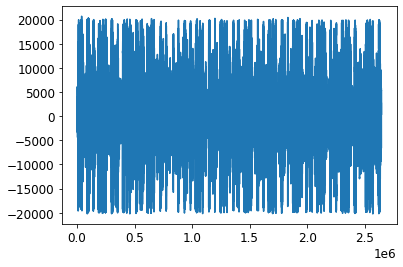

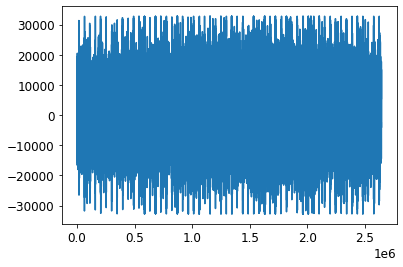

In [9]:
for features in x_train.take(3):
    data = features.numpy()
    data.shape
    plt.plot(data)
    plt.show()

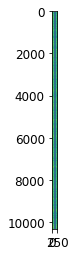

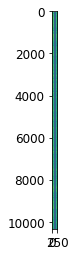

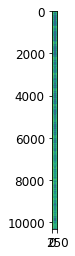

In [10]:
for features in x_train.take(3):
    features = features
    spectrogram = tfio.audio.spectrogram(
    features, nfft=512, window=512, stride=256)

    plt.figure()
    plt.imshow(tf.math.log(spectrogram).numpy())


In [ ]:
y_train.index

In [ ]:
print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))